# Neccessary Installations and Imports

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import os
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
from ultralytics import YOLO
from google.colab import output
from IPython import display
import zipfile
from IPython.display import Image as IPImage, display

# GPU Setup

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name())
else:
    device = torch.device("cpu")
    print('Using CPU')

Using GPU: Tesla T4


# Training
Skip this part if you already have a trained model. The trained model will be saved in the /content/runs/detect/train2/weights

**File setup:**
Yolo needs a parallel directory called datasets consisting of subdirectories: train, valid and test, each of which have a subdirectories images and labels. These can downloaded from roboflow and uploaded as a zip file, which will be then processed by the following script. In addition make sure to upload your yaml file that comes alongside with the dataset from roboflow

In [4]:
with zipfile.ZipFile("datasets.zip", 'r') as zip_ref:
    zip_ref.extractall()

Here the actual training takes place

In [5]:
#load the pretrained model
model = YOLO("yolov8s.pt")
model.to(device)
#train and save the model
# consider selecting single_cls=True
model.train(data="data.yaml", epochs=70)
model.export(format="onnx") # export the model you have trained

100%|██████████| 21.5M/21.5M [00:00<00:00, 213MB/s]


engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

100%|██████████| 755k/755k [00:00<00:00, 29.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 968 images, 123 backgrounds, 3 corrupt: 100%|██████████| 1093/1093 [00:00<00:00, 1945.52it/s]

train: WARNING ⚠️ /content/datasets/train/images/non_pothole_166.jpg: ignoring corrupt image/label: cannot identify image file '/content/datasets/train/images/non_pothole_166.jpg'
train: WARNING ⚠️ /content/datasets/train/images/non_pothole_172.jpg: ignoring corrupt image/label: cannot identify image file '/content/datasets/train/images/non_pothole_172.jpg'
train: WARNING ⚠️ /content/datasets/train/images/non_pothole_58.jpg: ignoring corrupt image/label: cannot identify image file '/content/datasets/train/images/non_pothole_58.jpg'
train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/valid/labels... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<00:00, 1251.35it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      4.33G      1.838      2.874      1.571          2        640: 100%|██████████| 69/69 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        121        286      0.508      0.364      0.383      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      4.39G      1.884      1.932       1.61         11        640: 100%|██████████| 69/69 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        121        286    0.00271     0.0524    0.00124   0.000596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      4.38G      1.989      1.962      1.678          8        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        121        286       0.13      0.224     0.0994     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      4.41G      1.891      1.918      1.643         26        640: 100%|██████████| 69/69 [00:28<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        121        286      0.413      0.301      0.305      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      4.38G      1.884      1.892      1.608         26        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        121        286      0.516      0.367      0.386      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70       4.4G      1.812      1.833      1.543          0        640: 100%|██████████| 69/69 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        121        286        0.4       0.35       0.34      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      4.41G      1.844       1.73      1.565          8        640: 100%|██████████| 69/69 [00:29<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        121        286      0.342       0.35      0.296      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      4.43G      1.812      1.763      1.559          4        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        121        286      0.612      0.416      0.482      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      4.38G      1.793      1.684      1.567          8        640: 100%|██████████| 69/69 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        121        286      0.634      0.517      0.585      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      4.44G      1.745      1.613       1.51          3        640: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        121        286      0.666      0.566      0.618      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      4.42G      1.695      1.535      1.478         14        640: 100%|██████████| 69/69 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        121        286      0.665      0.478      0.574      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      4.43G      1.731       1.54      1.496          6        640: 100%|██████████| 69/69 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        121        286      0.626      0.538      0.558      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      4.53G      1.657      1.499      1.471          2        640: 100%|██████████| 69/69 [00:29<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        121        286      0.647       0.58      0.621       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      4.54G       1.68      1.601      1.436          1        640: 100%|██████████| 69/69 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        121        286      0.655      0.531      0.595      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      4.44G      1.673      1.483      1.466          6        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        121        286       0.63      0.521      0.573      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      4.42G      1.639      1.432      1.446          7        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        121        286       0.72      0.611      0.681      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      4.43G      1.643       1.43      1.442          2        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        121        286       0.73      0.591      0.683      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      4.62G      1.596      1.374       1.39          8        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        121        286       0.74      0.563      0.632      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70       4.4G       1.62      1.424       1.42          5        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        121        286      0.737      0.612      0.701      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      4.41G      1.569      1.379      1.394         16        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        121        286      0.783      0.664      0.733      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      4.37G      1.575      1.299      1.387         10        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        121        286      0.637      0.608      0.658      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      4.55G      1.604      1.337      1.417          7        640: 100%|██████████| 69/69 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        121        286      0.755      0.591      0.688      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      4.38G      1.571      1.281      1.394         10        640: 100%|██████████| 69/69 [00:28<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        121        286      0.761      0.566      0.658      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70       4.4G      1.534      1.263       1.36          3        640: 100%|██████████| 69/69 [00:29<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        121        286      0.724      0.705      0.775      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      4.59G       1.51      1.256      1.362         10        640: 100%|██████████| 69/69 [00:28<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        121        286      0.829      0.636      0.761      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70       4.6G      1.517      1.245      1.364          7        640: 100%|██████████| 69/69 [00:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        121        286       0.76       0.64      0.725      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      4.54G      1.505      1.257      1.336          6        640: 100%|██████████| 69/69 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        121        286      0.803      0.656      0.762      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      4.55G      1.479      1.188      1.325          6        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        121        286      0.775      0.664      0.753      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      4.54G      1.468      1.184      1.327          5        640: 100%|██████████| 69/69 [00:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        121        286      0.776      0.701      0.783      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70       4.4G      1.474      1.187      1.328          1        640: 100%|██████████| 69/69 [00:28<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        121        286      0.812      0.671      0.773      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      4.43G      1.461      1.172      1.327          6        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        121        286      0.753      0.671       0.75      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      4.43G       1.43      1.129      1.301          4        640: 100%|██████████| 69/69 [00:29<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        121        286       0.85      0.692      0.799      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      4.39G      1.451      1.143      1.319         10        640: 100%|██████████| 69/69 [00:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        121        286      0.775      0.654      0.736      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      4.57G      1.417       1.11      1.287          3        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        121        286      0.816      0.727      0.817      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      4.56G       1.43      1.124      1.286          6        640: 100%|██████████| 69/69 [00:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        121        286      0.781      0.689      0.767      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70       4.4G       1.44      1.133      1.297          4        640: 100%|██████████| 69/69 [00:29<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        121        286      0.842      0.654      0.803      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      4.43G      1.432      1.093      1.286          8        640: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        121        286      0.759      0.696      0.773      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      4.56G       1.39      1.087      1.275          7        640: 100%|██████████| 69/69 [00:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        121        286      0.865      0.745      0.836      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      4.41G      1.374      1.083      1.268          7        640: 100%|██████████| 69/69 [00:28<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        121        286      0.852      0.738      0.832      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      4.41G      1.396      1.064       1.29         26        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        121        286      0.789      0.744      0.817      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      4.38G      1.366      1.036      1.262          2        640: 100%|██████████| 69/69 [00:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        121        286      0.843      0.724      0.833       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      4.56G      1.381      1.039      1.267          8        640: 100%|██████████| 69/69 [00:29<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        121        286      0.795      0.747      0.837       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      4.44G      1.379      1.016      1.261         15        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        121        286      0.813      0.761      0.842      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      4.47G      1.362       0.98       1.24         14        640: 100%|██████████| 69/69 [00:33<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        121        286      0.866      0.703      0.839      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      4.41G      1.363     0.9882       1.25         10        640: 100%|██████████| 69/69 [00:29<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        121        286      0.869      0.752      0.865      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      4.48G      1.386      1.012      1.264         11        640: 100%|██████████| 69/69 [00:29<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        121        286      0.858      0.734      0.837      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      4.41G      1.335     0.9622      1.241         14        640: 100%|██████████| 69/69 [00:28<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        121        286      0.832      0.747      0.848      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      4.41G      1.311     0.9488      1.211         10        640: 100%|██████████| 69/69 [00:28<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        121        286      0.862      0.766      0.864      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      4.41G      1.326     0.9563      1.226         11        640: 100%|██████████| 69/69 [00:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        121        286      0.875      0.761      0.865      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      4.44G      1.282     0.9162      1.208         12        640: 100%|██████████| 69/69 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        121        286      0.879      0.734      0.859      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70       4.4G      1.304     0.9296      1.227          6        640: 100%|██████████| 69/69 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        121        286      0.886       0.76      0.869      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      4.42G      1.268     0.9116      1.211          2        640: 100%|██████████| 69/69 [00:28<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        121        286       0.86      0.752      0.852      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      4.37G      1.279     0.9105      1.213          3        640: 100%|██████████| 69/69 [00:29<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        121        286      0.891      0.717      0.849      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      4.59G      1.287      0.893      1.208         12        640: 100%|██████████| 69/69 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        121        286      0.888      0.801      0.888      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      4.57G      1.257     0.8745      1.199          6        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        121        286       0.87      0.774      0.884      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      4.56G       1.22     0.8519      1.179         15        640: 100%|██████████| 69/69 [00:28<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        121        286      0.862      0.783      0.883      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      4.37G      1.235     0.8683      1.188          5        640: 100%|██████████| 69/69 [00:28<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        121        286      0.898      0.734      0.859      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      4.41G      1.218     0.8372      1.183          6        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        121        286      0.915       0.78      0.904      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70       4.4G      1.213      0.829      1.175          9        640: 100%|██████████| 69/69 [00:29<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        121        286      0.881      0.801      0.893      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      4.43G      1.227     0.8418      1.176          8        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        121        286      0.907      0.816      0.904      0.625


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      4.52G      1.201      0.819       1.15          4        640: 100%|██████████| 69/69 [00:29<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        121        286      0.868      0.811      0.904      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      4.38G      1.159     0.7476      1.126          7        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        121        286      0.884      0.843      0.905      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70       4.4G      1.134     0.7328      1.114          3        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        121        286      0.889      0.818      0.901      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      4.38G      1.142     0.7235      1.121          3        640: 100%|██████████| 69/69 [00:27<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        121        286      0.872      0.836      0.901      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70       4.4G       1.12     0.7002      1.101          2        640: 100%|██████████| 69/69 [00:27<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        121        286       0.89       0.85      0.912      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      4.63G      1.118     0.6976      1.121          2        640: 100%|██████████| 69/69 [00:26<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        121        286      0.899      0.839      0.916      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      4.41G      1.092     0.6891      1.089          3        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        121        286      0.878       0.83      0.908      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      4.39G      1.085     0.6793      1.088          4        640: 100%|██████████| 69/69 [00:26<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        121        286      0.914      0.811      0.909       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      4.36G      1.104     0.7034      1.094          2        640: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        121        286      0.895      0.838      0.914      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      4.57G       1.06     0.6545      1.071          5        640: 100%|██████████| 69/69 [00:27<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        121        286      0.899      0.838      0.914      0.671



70 epochs completed in 0.610 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all        121        286      0.895      0.839      0.914      0.673
Speed: 0.4ms preprocess, 6.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.1.37 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 10.7s, saved as 'runs/detect/train/weights/best.onnx' (42.6 MB)

Export complet

'runs/detect/train/weights/best.onnx'

# Testset Testing

Upload testset.zip containing the test image. Make sure that your test images that contain potholes or cracks have names starting with "p".



In [6]:
with zipfile.ZipFile("testset.zip", 'r') as zip_ref:
    zip_ref.extractall()

Running the model on testset images

In [7]:
#Params
test_path = "/content/testset"
pt_file = "/content/runs/detect/train/weights/best.pt"
min_confidence = 0.56

#Preparing test images
test_images = []
num_pothole_images = 0
num_clean_images = 0
for filename in os.listdir(test_path):
    file_path = os.path.join(test_path, filename)
    test_images.append(file_path)
    if filename.startswith('p'):
        num_pothole_images = num_pothole_images + 1
    else:
        num_clean_images = num_clean_images + 1

#Test
model=YOLO(pt_file)
model.to(device)
result = model(source=test_images,save=True,save_txt=True,save_conf=True,conf=min_confidence)


0: 640x640 (no detections), 9.3ms
1: 640x640 (no detections), 9.3ms
2: 640x640 (no detections), 9.3ms
3: 640x640 (no detections), 9.3ms
4: 640x640 2 potholes, 9.3ms
5: 640x640 (no detections), 9.3ms
6: 640x640 (no detections), 9.3ms
7: 640x640 (no detections), 9.3ms
8: 640x640 (no detections), 9.3ms
9: 640x640 (no detections), 9.3ms
10: 640x640 1 pothole, 9.3ms
11: 640x640 7 potholes, 9.3ms
12: 640x640 1 pothole, 9.3ms
13: 640x640 (no detections), 9.3ms
14: 640x640 1 pothole, 9.3ms
15: 640x640 (no detections), 9.3ms
16: 640x640 (no detections), 9.3ms
17: 640x640 3 potholes, 9.3ms
18: 640x640 (no detections), 9.3ms
19: 640x640 1 pothole, 9.3ms
20: 640x640 4 potholes, 9.3ms
21: 640x640 1 pothole, 9.3ms
22: 640x640 4 potholes, 9.3ms
23: 640x640 (no detections), 9.3ms
24: 640x640 (no detections), 9.3ms
25: 640x640 (no detections), 9.3ms
26: 640x640 (no detections), 9.3ms
27: 640x640 (no detections), 9.3ms
28: 640x640 (no detections), 9.3ms
29: 640x640 1 pothole, 9.3ms
30: 640x640 (no dete

Copy the results path from the output of the previous cell into path1 variable

True positives: 50
True negatives: 162
False positives: 1
False negatives: 21
Accuracy: 0.905982905982906
Precision: 0.9803921568627451
Recall: 0.704225352112676


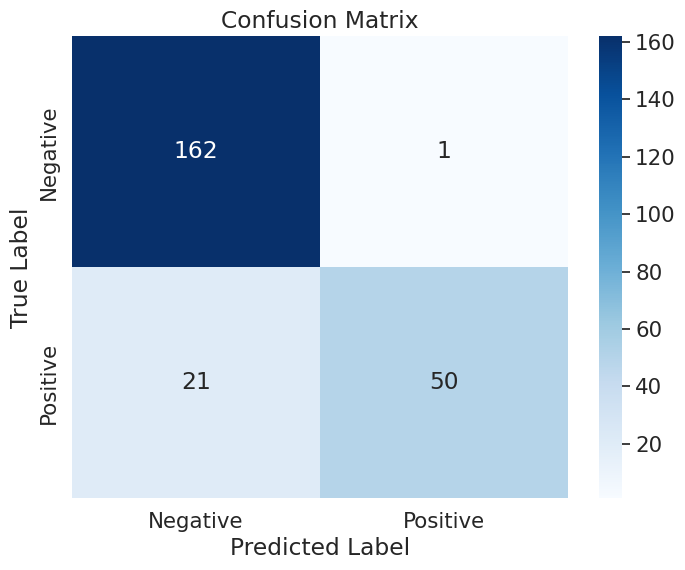

In [9]:
#IMPORTANT copy the results path from the output of the previous cell
path1 = "runs/detect/predict"

true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0
#get the data of detected objects
path2 = "labels"
directory = os.path.join(path1, path2)
if len(os.listdir(directory)) == 0:
    print("No Potholes and no cracks detected across the whole dataset")
else:
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            if filename.lower().endswith('.txt'):
                if filename.startswith('p'):
                    true_positives = true_positives + 1
                else:
                    false_positives = false_positives + 1
    #calculate the classification categories
    false_negatives = num_pothole_images - true_positives
    true_negatives = num_clean_images - false_positives
    print("True positives: " + str(true_positives))
    print("True negatives: " + str(true_negatives))
    print("False positives: " + str(false_positives))
    print("False negatives: " + str(false_negatives))
    #calculate the metrics
    accuracy = (true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
    precision = (true_positives)/(true_positives+false_positives)
    recall = (true_positives)/(true_positives+false_negatives)
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    conf_matrix = [[true_negatives, false_positives], [false_negatives, true_positives]]

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)  # Adjust font scale for better visualization
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()